# <FONT COLOR="9D2235">*Final Exam Jupyter notebook*</FONT>

## **[CSCI 580](https://www.ecst.csuchico.edu/~bjuliano/csci580/)**, Fall 2023

Your Name Goes Here

# **Instructions**

Perform each of the following tasks as completely as you can. For full credit, make sure to use **text sections** to explain in simple English terms what you did and what was your thought process, and **code sections** to provide working Python code with some comments to explain technical details, as necessary.

# <FONT COLOR="DE5750">A. Build the following *kNN classifiers* using the *Iris* dataset.</FONT>

1.   `modelA1`: 75%-25% split
2.   `modelA2`: 75%-25% split with the 75% split for training using 10-fold CV

Additionally:
* Use the default hyperparameters and $k$=13 when generating the two models.
* Select three metrics for comparison, where one of them must be the ROC curve chart with the calculated AUC.

Based on the metrics you used, which model performs better? Explain why you think the performance of that model is better than the other one.

**Note:** See our *PML-09 Jupyter notebook* for reference.

## Solution(s)

Load the *Iris* dataset from sklearn ...

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

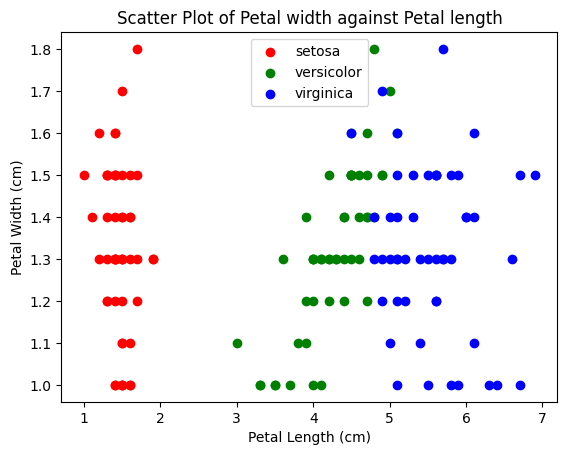

Petal Length min: 0.0, Petal Length max: 7.9
0.044000000000000004


In [2]:
from sklearn import datasets, svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Instantiate a Bunch object
iris = datasets.load_iris()
# Print some information about the dataset
print(iris.DESCR)

X = iris.data[:, 2:4] # using the third and fourth features
print(X)
y = iris.target

# plotting points
colors = ['red', 'green', 'blue',]
for color, i, target in zip(colors, [0, 1, 2,], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==1, 1], color=color, label=target)
    
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='best', scatterpoints=1)

plt.title('Scatter Plot of Petal width against Petal length')
plt.show()



#MOVE DOWN TO NEXT CELL WHEN DONE 
from sklearn.model_selection import train_test_split

k = 13
# training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
modelA1 = KNeighborsClassifier(n_neighbors=k)

# fitting model
modelA1.fit(X_train, y_train)

# min and max for 2-4th feature
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1

# z_min, z_max = X[:, 2].min() -1, X[:, 2].max() +1


# step size for mesh
h = (x_max / 1)/100
# h = min((x_max - x_min) / 100, (y_max - y_min) / 100, (z_max - z_min) / 100)
h = min((x_max - x_min) / 100, (y_max - y_min) / 100)



# making predictions
xx, yy, = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h),)
                    #  np.arange(z_min, z_max, h))

# print(xx)
# Z = modelA1.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = modelA1.predict(np.c_[xx.ravel(), yy.ravel()])






# <FONT COLOR="9D2235">*ModelA1*</FONT>


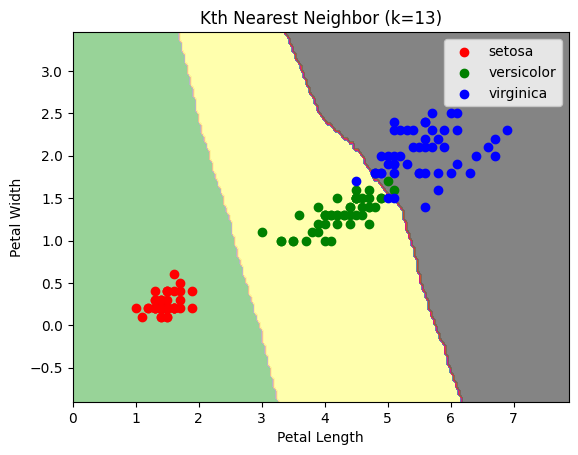

In [9]:

# # drawing result
xx = xx.reshape(-1, xx.shape[-1])
yy = yy.reshape(-1, yy.shape[-1])
# zz = zz.reshape(-1, zz.shape[-1])
Z = Z.reshape(-1, xx.shape[-1])
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
k = 13
# plotting training points

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0,1,2,], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title(f'Kth Nearest Neighbor (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

# <FONT COLOR="9D2235">*ModelA2*</FONT>


1 0.9666666666666666
2 0.96
3 0.96
4 0.96
5 0.9666666666666666
6 0.9666666666666666
7 0.96
8 0.96
9 0.96
10 0.96
11 0.9666666666666666
12 0.96
13 0.96


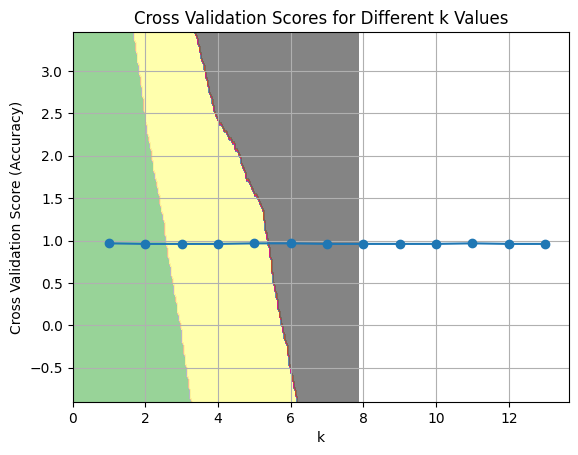

In [17]:
from sklearn.model_selection import cross_val_score

# holds cross-validated score
cv_scores = []

# using third and fourth feature
X = iris.data[:, 2:4]
y = iris.target



# number of folds
fold = 10

# creating off list of K for KNN
ks = list(range(1,int(len(X) * ((fold - 1)/fold))))

# remove all multiples of 3
ks = range(1, 14)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# perform k-fold cross validation
for k in ks:
    modelA2 = KNeighborsClassifier(n_neighbors=k)
    # performing cross validation and returns average accuracy
    scores = cross_val_score(modelA2, X, y, cv=fold, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean)
    
# fitting model
modelA2.fit(X_train, y_train)

# min and max for 2-4th feature
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1

Z = modelA2.predict(np.c_[xx.ravel(), yy.ravel()])

# # drawing result
xx = xx.reshape(-1, xx.shape[-1])
yy = yy.reshape(-1, yy.shape[-1])
Z = Z.reshape(-1, xx.shape[-1])
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

# plotting  points
plt.plot(ks, cv_scores, marker='o')
plt.title('Cross Validation Scores for Different k Values')
plt.xlabel('k')
plt.ylabel('Cross Validation Score (Accuracy)')
plt.grid(True)
plt.show()


### Performance Comparisons

|Metric|<FONT COLOR="9D2235">`modelA1`</FONT>|<FONT COLOR="9D2235">`modelA2`</FONT>|
|:-|:-:|:-:|
|metric 1| `x.xxx` | `x.xxx` |
|metric 2| `x.xxx` | `x.xxx` |
|ROC AUC| `x.xxx` | `x.xxx` |

Your analysis and interpretations go here.

The 10-fold cross validation model, modelA2, performed very well in classification, getting a 96% accuracy 

# <FONT COLOR="DE5750">B. Build the following *logistic regression* classifiers using the *Breast Cancer* dataset.</FONT>

1.   `modelB1`: 75%-25% split
2.   `modelB2`: 75%-25% split with the 75% split for training using 10-fold CV

Additionally:
* Generate the correlation matrix using all 30 attributes to select the top 3 that are most correlated with the predicted attribute.
* Use the default hyperparameters and the same three attributes when generating the two models.
* Show the model equation for each of your models.
* Select three metrics for comparison, where one of them must be the ROC curve chart with the calculated AUC.

Based on the metrics you used, which model performs better? Explain why you think the performance of that model is better than the other one.

**Note:** See our *PML-07 Jupyter notebook* for reference.

## Solution(s)

Load the *Breast Cancer* dataset from sklearn ...


Top 3 Malignant Correlation Attributes
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
Name: target, dtype: float64


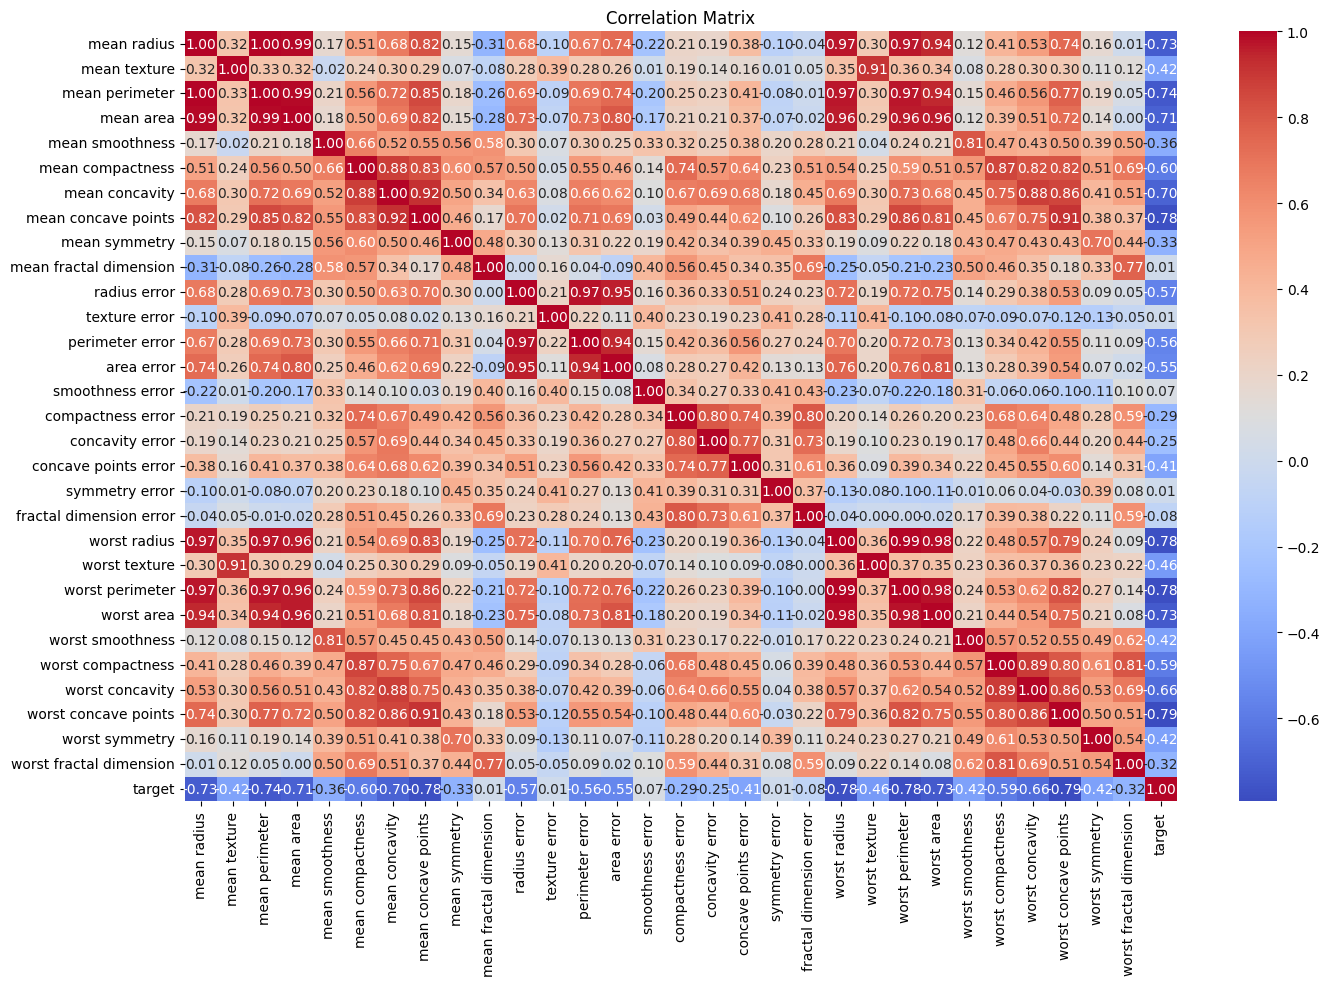

In [30]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
# Instantiate a Bunch object
cancer = load_breast_cancer()
# print(cancer.DESCR)
cols = np.append(cancer.feature_names, ["target"])
data = np.c_[cancer.data, cancer.target]

df = pd.DataFrame(data=data, columns=cols)

# generate coorolation matrix
corr_mat = df.corr()

sorted_corr = corr_mat['target'].abs().sort_values(ascending=False)
top_3 = sorted_corr[1:4]
print('\nTop 3 Malignant Correlation Attributes')
print(top_3)

# plotting heatmap of top predicting attribute
plt.figure(figsize=(16,10))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


ValueError: shapes (3808570,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

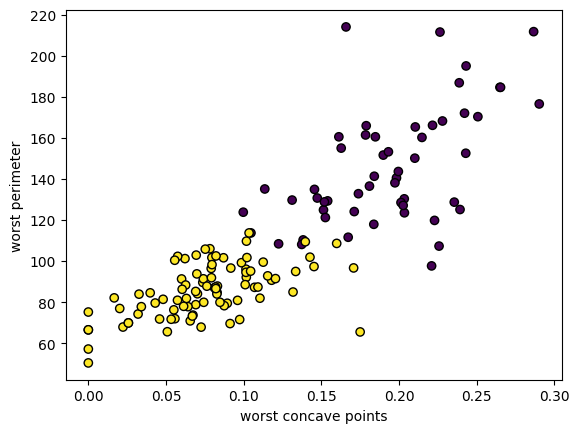

In [36]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.special import expit
X = df[top_3.index]
y = df['target']

modelB1 = linear_model.LogisticRegression()

# training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

modelB1.fit(X_train, y_train)

pred = modelB1.predict(X_test)
# get params
params = modelB1.get_params()

print(f'Model hyperparams: {params}')
# print model intercept
print('Intercept:', modelB1.intercept_) # [ 8.19393897]
# print model coef
print('Coefficient(s):', modelB1.coef_) # [[-0.54291739]]


plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='viridis', edgecolors='k', marker='o', label='Actual Data')
plt.xlabel(top_3.index[0])
plt.ylabel(top_3.index[1])

# # Create a meshgrid for the sigmoid curve
# x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
# y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# # Plot the sigmoid curve
# Z = expit(np.c_[xx.ravel(), yy.ravel()].dot(modelB1.coef_.T) + modelB1.intercept_)
# Z = Z.reshape(xx.shape)
# plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='red', label='Sigmoid Curve')

# plt.legend()
# plt.title('Scatterplot with Sigmoid Curve')
# plt.show()

### Performance Comparisons

|Metric|<FONT COLOR="9D2235">`modelB1`</FONT>|<FONT COLOR="9D2235">`modelB2`</FONT>|
|:-|:-:|:-:|
|metric 1| `x.xxx` | `x.xxx` |
|metric 2| `x.xxx` | `x.xxx` |
|ROC AUC| `x.xxx` | `x.xxx` |

Your analysis and interpretations go here.

# Notes

<FONT COLOR="DE5750">*(REQUIRED)* Include your overall final thoughts, comments, or observations regarding this activity here.</FONT>